In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale, minmax_scale,robust_scale

from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score, roc_curve, auc

%matplotlib inline

from collections import Counter

import sys

#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#confusion matrix
from sklearn.metrics import confusion_matrix

In [6]:
df_raw= pd.read_csv('~/PDP/Data Set/TAT_real_new.csv',engine='python',encoding='cp949')
# df_raw = df_raw.drop(['INDEX','LOT_ID','PANEL_ID'],axis=1)

In [7]:
#설명변수, 목표변수 데이터 지정
df_raw_x = df_raw.drop('JUDGE',axis=1, inplace=False)
df_raw_y = df_raw['JUDGE']

#train test split
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                               test_size=0.3, random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape)) 

train data X size : (2743, 16)
train data Y size : (2743,)
test data X size : (1176, 16)
test data X size : (1176,)


In [8]:
#의사결정 나무
tree_final= DecisionTreeClassifier(min_samples_leaf=8,random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [9]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance = df_importance.round(3).head(20)
df_importance

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.360
6,TAT_3BUS_2FIRE,0.161
5,TAT_3BUS_1DEVELOP,0.078
2,TAT_2AG_1PRINT,0.073
10,TAT_6PHOS_1R_2DRY,0.063
15,TAT_8AGING,0.061
13,TAT_6PHOS_3B_1DISPENSER,0.043
4,TAT_2AG_3EXPOSURE,0.037
14,TAT_6PHOS_4FIRE,0.024
9,TAT_6PHOS_1R_1DISPENSER,0.020


Text(0, 0.5, 'Feature')

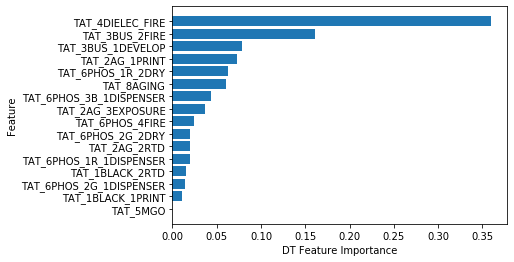

In [10]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('DT Feature Importance')
plt.ylabel('Feature')

# 랜덤포레스트

In [11]:
rf_final = RandomForestClassifier(random_state = 1234,n_estimators = 100 , min_samples_leaf = 8)
rf_final.fit(df_train_x,df_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [12]:
v_feature_name = df_train_x.columns

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# 데이블을 중요도 순으로 정렬￼TAT_RF_MODELING.ipynb

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance = df_importance.round(3).head(20)
df_importance

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.318
6,TAT_3BUS_2FIRE,0.100
13,TAT_6PHOS_3B_1DISPENSER,0.092
14,TAT_6PHOS_4FIRE,0.065
5,TAT_3BUS_1DEVELOP,0.061
2,TAT_2AG_1PRINT,0.053
10,TAT_6PHOS_1R_2DRY,0.052
4,TAT_2AG_3EXPOSURE,0.048
12,TAT_6PHOS_2G_2DRY,0.044
15,TAT_8AGING,0.041


Text(0, 0.5, 'Feature')

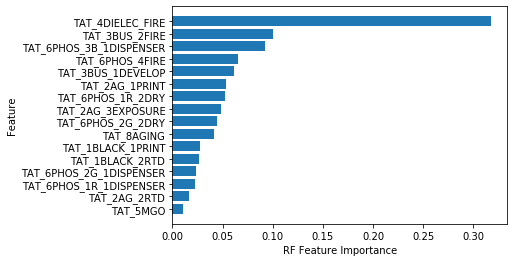

In [13]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,width = df_importance["Importance"] )
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("RF Feature Importance")
plt.ylabel("Feature")

# 그래디언트 부스팅

In [14]:
rf_final = RandomForestClassifier(random_state = 1234,n_estimators = 100 , min_samples_leaf = 8)
rf_final.fit(df_train_x,df_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [15]:
v_feature_name = df_train_x.columns

# 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# 데이블을 중요도 순으로 정렬￼TAT_RF_MODELING.ipynb

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance = df_importance.round(3).head(20)
df_importance

,Feature,Importance
7,TAT_4DIELEC_FIRE,0.318
6,TAT_3BUS_2FIRE,0.100
13,TAT_6PHOS_3B_1DISPENSER,0.092
14,TAT_6PHOS_4FIRE,0.065
5,TAT_3BUS_1DEVELOP,0.061
2,TAT_2AG_1PRINT,0.053
10,TAT_6PHOS_1R_2DRY,0.052
4,TAT_2AG_3EXPOSURE,0.048
12,TAT_6PHOS_2G_2DRY,0.044
15,TAT_8AGING,0.041


Text(0, 0.5, 'Feature')

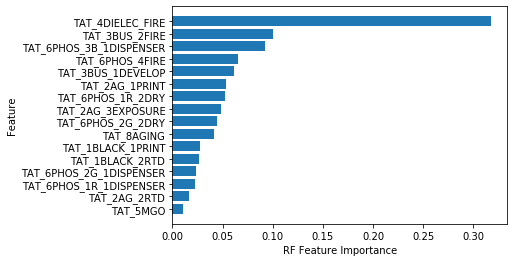

In [16]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,width = df_importance["Importance"] )
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("RF Feature Importance")
plt.ylabel("Feature")